In [1]:
import os.path
import sys

import os

# Récupère le chemin d'accès parent de sys.path[0]
parent_dir = os.path.dirname(sys.path[0])

sys.path.append(os.path.abspath(parent_dir))
import importlib
import algorithmes
importlib.reload(algorithmes)
from algorithmes import *
import random
import mesa
import bisect

import gym
import numpy as np
import random
import tensorflow as tf
from collections import deque


In [2]:
nombre_client  = 10

STATE_SIZE = 6400
ACTION_SIZE = 3
LEARNING_RATE = 0.001
GAMMA = 0.99
BATCH_SIZE = 32
MEMORY_SIZE = 1000000


In [6]:
# Extraire tous les arcs de la route
route = [[0,1,2,3,4],[8,6,7],[5,9]]
arcs_voiture = set()
for sous_route in route:
    sous_route = [0]+sous_route+[0]
    arcs_voiture.update(set(zip(sous_route, sous_route[1:])))

# Initialiser la matrice d'adjacence avec des zéros
n = max(list(itertools.chain.from_iterable(route)))+1
matrice_adj = [[0]*n for _ in range(n)]

# Mettre à jour les valeurs correspondantes à chaque arc
for i, j in arcs_voiture:
    matrice_adj[i][j] = 1
    #matrice_adj[i][j] = matrice_temps_Cij[i][j]
     
    
print(np.array(matrice_adj))

[[0 1 0 0 0 1 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]


In [43]:
def get_matrice_adjacence(route):
     

    # Extraire tous les arcs de la route
    arcs_voiture = set()
    for sous_route in route:
        sous_route = [-1]+sous_route+[-1]
        arcs_voiture.update(set(zip(sous_route, sous_route[1:])))

    # Initialiser la matrice d'adjacence avec des zéros
    n = max(list(itertools.chain.from_iterable(route)))+2
    matrice_adj = [[0]*n for _ in range(n)]

    # Mettre à jour les valeurs correspondantes à chaque arc
    for i, j in arcs_voiture:
        matrice_adj[i+1][j+1] = 1
        #matrice_adj[i+1][j+1] = matrice_temps_Cij[i][j]
        
        
    
    return(np.array(matrice_adj))


In [44]:
get_matrice_adjacence(route)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0,

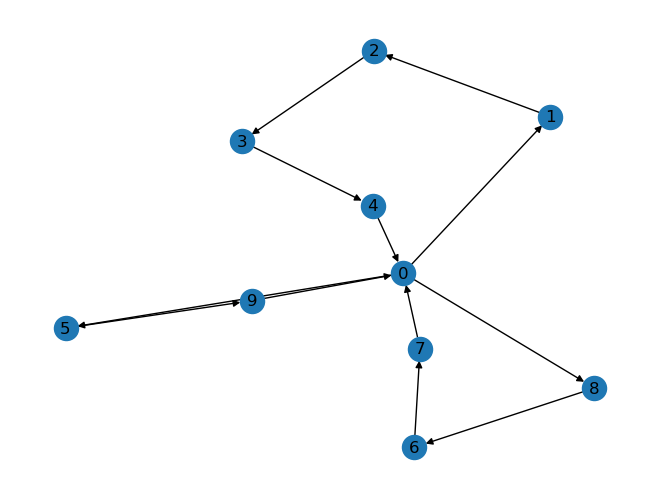

In [48]:
import networkx as nx

# Define the edges in the graph
edges = arcs_voiture

# Create a directed graph from the edge list
G = nx.DiGraph(edges)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

In [60]:
time_window = 600

In [59]:
# genere des solution aléatoire
def get_solution_random(nombre_client):
    list_client =  [i for i in range(nombre_client)]
    random.shuffle(list_client)
    solution = get_route_version2(list_client,time_window,Q)
    return(solution)

## utiliser fonction cout pour calculer le cout d'une fonction

In [66]:
route = get_solution_random(15)

In [36]:
#route = get_solution_random(30)
print(route)
G =list(itertools.chain.from_iterable(route))
print(list(itertools.chain.from_iterable(route)))
G[20],G[19] = G[19],G[20]

print(get_route_version2(G,time_window,Q))


[[11, 22, 15, 2, 12, 29, 24, 1, 5, 18, 14, 6, 21, 28, 16, 3, 26, 4, 7, 27], [13, 0, 23, 19, 10, 17, 8, 25, 9, 20]]
[11, 22, 15, 2, 12, 29, 24, 1, 5, 18, 14, 6, 21, 28, 16, 3, 26, 4, 7, 27, 13, 0, 23, 19, 10, 17, 8, 25, 9, 20]
[[11, 22, 15, 2, 12, 29, 24, 1, 5, 18, 14, 6, 21, 28, 16, 3, 26, 4, 7], [13, 27, 0, 23, 19, 10, 17, 8, 25, 9, 20]]


In [37]:
def get_voisinage(i,route):
    G= list(itertools.chain.from_iterable(route))
    G[i],G[i+1] = G[i+1],G[i]
    return(get_route_version2(G,time_window,Q))
    

In [96]:
def plot_routes(Solution, pos):
    arcs_voiture = set()
    for sous_route in Solution:
        sous_route = ["dp"]+sous_route+["dp"]
        arcs_voiture.update(set(zip(sous_route, sous_route[1:])))

    # Define the edges in the graph
    edges = arcs_voiture

    # Create a directed graph from the edge list
    G = nx.DiGraph(edges)


    nx.draw(G, pos, with_labels=True)
    plt.show()


    

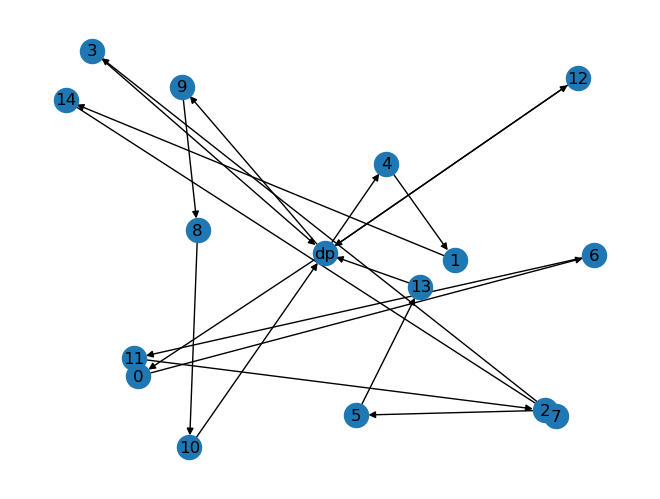

In [100]:
import time
from IPython.display import clear_output

# Specify fixed positions for the nodes
pos = {i: (random.random(), random.random()) for i in ["dp"]+[i for i in range(15)]}
pos['dp'] = (0.5,0.5)
plot_routes(route, pos)
for i in range(14):
    clear_output(wait=True)
    
    plot_routes(get_voisinage(i,route),pos)

    time.sleep(1)

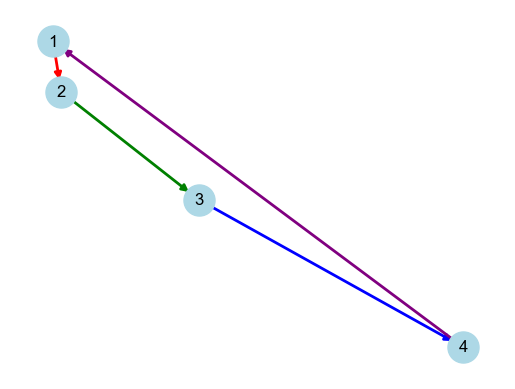

In [78]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the edges in the graph
edges = [(1, 2), (2, 3), (3, 4), (4, 1)]

# Create a directed graph from the edge list
G = nx.DiGraph(edges)

# Specify fixed positions for the nodes
#pos = {1: (0, 0), 2: (1, 1), 3: (2, 0), 4: (1, -1)}
pos = {i: (random.random(), random.random()) for i in range(1, 5)}

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

# Draw the edges with fixed positions

nx.draw_networkx_edges(G, pos, edgelist=[(1, 2)], width=2, edge_color='red', arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=[(2, 3)], width=2, edge_color='green', arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=[(3, 4)], width=2, edge_color='blue', arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=[(4, 1)], width=2, edge_color='purple', arrows=True)

# Draw the node labels
nx.draw_networkx_labels(G, pos, font_size=12, font_family='Arial')

# Show the plot
plt.axis('off')
plt.show()

In [ ]:
import gym
from gym import spaces
import numpy as np

class CustomEnvironment(gym.Env):
    def __init__(self):
        self.observation_space = spaces.Box(low=0, high=1, shape=(4,))
        self.action_space = spaces.Discrete(2)
        self.state = np.zeros(4)
        self.done = False
        self.reward_range = (-1, 1)

    def reset(self):
        self.state = np.zeros(4)
        self.done = False
        return self.state

    def step(self, action):
        if action == 0:
            self.state[0] += 0.1
        else:
            self.state[0] -= 0.1

        self.state[1:] += self.state[:-1]
        self.state = np.clip(self.state, 0, 1)

        reward = self._get_reward()
        self.done = self._is_done()

        return self.state, reward, self.done, {}

    def _get_reward(self):
        if self.state[-1] >= 1:
            return 1
        else:
            return -1

    def _is_done(self):
        return self.state[-1] >= 1


In [ ]:
class DeepQNetwork:
    def __init__(self, state_size, action_size, learning_rate, name='DeepQNetwork'):
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate
        
        with tf.variable_scope(name):
            self.inputs = tf.placeholder(tf.float32, [None, state_size], name='inputs')
            self.actions = tf.placeholder(tf.float32, [None, action_size], name='actions')
            self.target_Q = tf.placeholder(tf.float32, [None], name='target')
            
            # Fully connected layer
            self.fc = tf.layers.dense(inputs=self.inputs, units=64, activation=tf.nn.relu)
            
            # Output layer
            self.output = tf.layers.dense(inputs=self.fc, units=action_size)
            
            # Q values for actions
            self.Q = tf.reduce_sum(tf.multiply(self.output, self.actions), axis=1)
            
            # Loss function
            self.loss = tf.reduce_mean(tf.square(self.target_Q - self.Q))
            
            # Optimizer
            self.optimizer = tf.train.AdamOptimizer(self.learning_rate).minimize(self.loss)


In [ ]:
class DQNAgent:
    def __init__(self, state_size, action_size, learning_rate, gamma, batch_size, memory_size):
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.batch_size = batch_size
        self.memory = deque(maxlen=memory_size)
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_decay = 0.995
        self.epsilon_min = 0.01
        self.model = DeepQNetwork(state_size, action_size, learning_rate)
        self.target_model = DeepQNetwork(state_size, action_size, learning_rate, name='TargetDeepQNetwork')
        
    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        Q_values = self.model.sess.run(self.model.output, feed_dict={self.model.inputs: state.reshape(1, self.state_size)})
        return np.argmax(Q_values[0])
    
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
        
    def replay(self):
        if len(self.memory) < self.batch_size:
            return
        
        minibatch = random.sample(self.memory, self.batch_size)
        states = np.zeros((self.batch_size, self.state_size))
        actions = np.zeros((self.batch_size, self.action_size))
        rewards = np.zeros((self.batch_size,))
        next_states = np.zeros((self.batch_size, self.state_size))
        dones = np.zeros((self.batch_size,))
        
        for i in range(self.batch_size):
            state, action, reward, next_state, done = minibatch[i]
            states[i] = state
            actions[i] = action
            rewards[i] = reward
            next_states[i] = next_state
            dones[i] = done
            
        target_Qs = self.target_model.sess.run(self.target_model.output, feed_dict={self.target_model.inputs: next_states})
        targets = rewards + self.gamma * np.max(target_Qs, axis=1) * (1 - dones)
        
        loss, _ = self.model.sess.run([self.model.loss, self.model.optimizer], 
                                      feed_dict={self.model.inputs: states, 
                                                 self.model.actions: actions, 
                                                 self.model.target_Q: targets})
        
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
            
    def update_target_model(self):
        self.target_model.model.set_weights(self.model.model.get_weights())


In [ ]:
env = CustomEnvironment()
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
learning_rate = 0.001
gamma = 0.99
batch_size = 32
memory_size = 10000
episodes = 500

agent = DQNAgent(state_size, action_size, learning_rate, gamma, batch_size, memory_size)

for episode in range(episodes):
    state = env.reset()
    total_reward = 0
    done = False
    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        agent.replay()
        total_reward += reward
    agent.update_target_model()
    print('Episode:', episode, 'Total reward:', total_reward, 'Epsilon:', agent.epsilon)
